In [16]:
import sys
sys.path.append('../../../')
import RdPCA.src.model as rdpca

import numpy as np
import pandas as pd
import seaborn as sns
import torch
import matplotlib.pyplot as plt

from scipy.io import mmread
from openTSNE import TSNE

In [31]:
name = 'macosko'
#exp_data = mmread('../../data/%s/matrix.mtx' % name).toarray()
hvg = pd.read_csv('../../data/%s/hvg.vst.tsv' % name, index_col=0)['x'].values
exp_data_meta = pd.read_csv('../../data/%s/meta.csv' % name, index_col=0)
arr = exp_data.sum(axis=0)
size_factor = arr/arr.mean()
exp_data_row = pd.read_csv('../../data/%s/features.tsv' % name)['x']
exp_data_col = pd.read_csv('../../data/%s/barcodes.tsv' % name)['x']

In [32]:
size_factor

array([1.5792144 , 0.69302435, 0.71251036, ..., 2.22987785, 0.4558033 ,
       1.21152178])

In [33]:
device_cuda_list = [torch.device("cuda:{}".format(i)) for i in range(6)[::-1]]
torch.set_default_tensor_type(torch.FloatTensor)
dtype = torch.float32
data = pd.DataFrame(exp_data, index=exp_data_row, columns=exp_data_col)
expr_mat = torch.tensor(data.T.loc[:,hvg[:3000]].values, dtype=dtype)
cc_mat = torch.zeros((expr_mat.shape[0],2), dtype=dtype)
sf = torch.tensor(size_factor, dtype=dtype)
batch_mat = torch.zeros((expr_mat.shape[0],1), dtype=dtype)
device = device_cuda_list[3]

In [40]:
import imp
import time
imp.reload(rdpca)
torch.manual_seed(0)
n_lat = 20
start = time.time()
red = rdpca.fit_pca_linear(expr_mat, n_lat, cc_mat, sf, batch_mat, device=device)
time.time() - start

step 0: loss 2069.27
step 50: loss 189.16
step 100: loss 151.55
step 150: loss 136.68
step 200: loss 129.43
step 250: loss 124.01
step 300: loss 122.14
step 350: loss 121.15
step 400: loss 122.31
step 450: loss 120.21
step 500: loss 119.92
step 550: loss 119.84


76.67725896835327

In [41]:
np.savetxt('rdpca.csv', red.detach().cpu().numpy(), delimiter=',')

# RdPCA

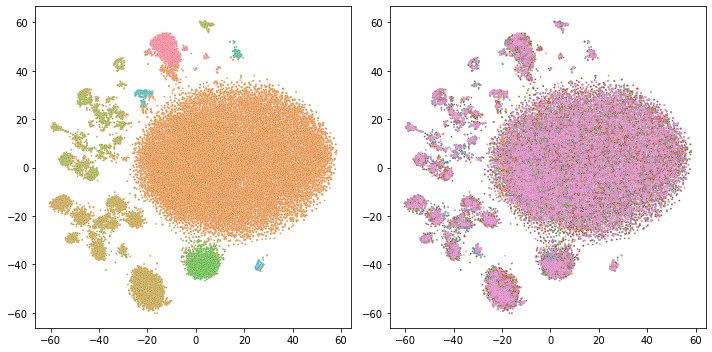

In [42]:
np.random.seed(0)
tsne2 = TSNE(n_jobs=4, perplexity=70).fit(red.detach().cpu().numpy()[:,:50])

fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
               hue=exp_data_meta['cell_type1'], legend=False,
                s=3, ax=ax[0]
               )
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
                hue=exp_data_meta['donor'], legend=False,
                s=3, ax=ax[1])
plt.tight_layout()

# PCA

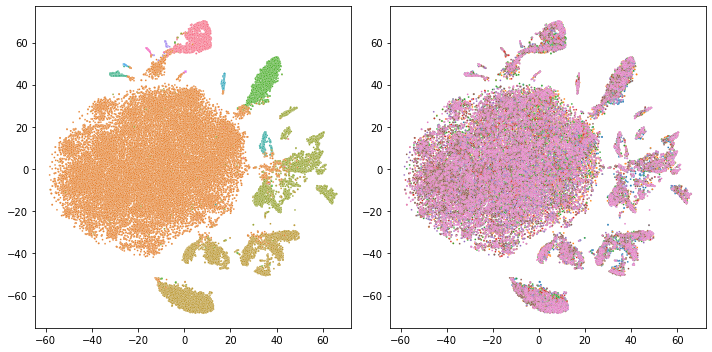

In [44]:
np.random.seed(0)
tsne2 = TSNE(n_jobs=4, perplexity=70).fit(pd.read_csv('pca.csv', index_col=0).iloc[:,:20].values)

fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
               hue=exp_data_meta['cell_type1'], legend=False,
                s=3, ax=ax[0]
               )
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
                hue=exp_data_meta['donor'], legend=False,
                s=3, ax=ax[1])
plt.tight_layout()

# SCTransform

In [ ]:
np.random.seed(0)
tsne2 = TSNE(n_jobs=4, perplexity=70).fit(pd.read_csv('sct.csv', index_col=0).iloc[:,:20].values)

fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
               hue=exp_data_meta['cell_type1'], legend=False,
                s=3, ax=ax[0]
               )
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
                hue=exp_data_meta['donor'], legend=False,
                s=3, ax=ax[1])
plt.tight_layout()

# GLM-PCA

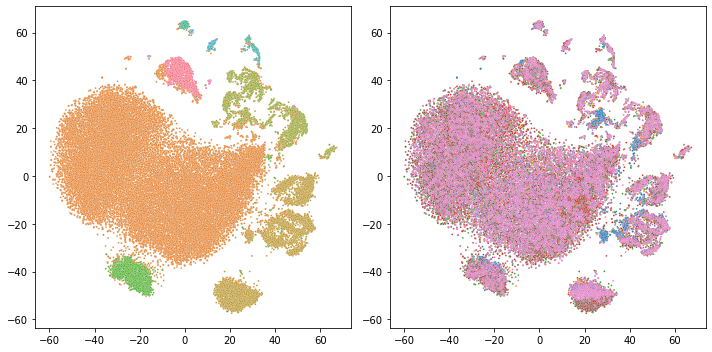

In [49]:
np.random.seed(0)
#tsne2 = TSNE(n_jobs=4, perplexity=70).fit(pd.read_csv('glmpca.csv', index_col=0).iloc[:,:30].values)

fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
               hue=exp_data_meta['cell_type1'], legend=False,
                s=3, ax=ax[0]
               )
sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1],
                hue=exp_data_meta['donor'], legend=False,
                s=3, ax=ax[1])
plt.tight_layout()